# COGS 108 - Final Project 

# Overview

Over the last quarter, Team Money analyzed data about 378,661 projects on Kickstarter from the site’s inception in 2009 until early 2018. Through the analysis we sought to find differences between projects of different states (i.e. Successful, Failed, Canceled, Suspended) and to learn about how project authors viewed and used Kickstarter over the years. We conclude that this dataset does show few significant differences between the states and it reveals a greater picture of how Kickstarter has changed over the years.


# Names
- Isaac Kim
- Chaitanya Prashant
- Gabriel Schaub
- Wenming Zhai
- Nha Do
- Zexiang Chen

# Group Members IDs

- A12690881
- A13827758
- A12985995
- A12909368
- A12842952
- A15137850


# Background and Prior Work

## General Background

Kickstarter, an online platform enabling groups to crowdsource funding for their projects, has recently celebrated their tenth year anniversary. Each project must specify a minimum funding goal as well as a deadline for their funding. They also specify what category and sub-category their project falls under. An example would be category of games and sub-category of tabletop games. It seems difficult to determine why certain projects succeed and others fail by comparing individual projects to each other. With highly successful projects such as the card game, Exploding Kittens, or the smartwatch, Pebble Time, Kickstarter has allowed many creators to crowdfund for projects under any category such as art, games, technology, or dance. However, with a plethora of projects posted, there is no guarantee that they will all be delivered to their end goal and production. This leads us to question whether we can use data science and features of the dataset like duration of project and category to find relationships between these features and the success or failure of projects. Thus we ask the questions: Are there factors that make a project successful? Are there factors that play a role in the early termination of a project? 
Given collected data provided by the Kickstarter platform, we have access to a range of projects’ topic, duration times, state of success, pledge goal, etc. 

## Prior Work


A similar project, done by Adebola Lamidi, aimed to predict the success of Kickstarter campaigns. He originally started with a dataset with 45,957 projects and 17 features. Because the objective of this analysis was to predict whether a campaign would succeed or fail, he eliminated projects with the status of either ‘live, suspended, or cancelled, thus reducing the dataset to 41,965 projects and 17 features. Although our study also analyzes whether there are characteristics of a project that influence a project’s success, we also explore projects of other states. In other words, we include the suspended and cancelled statuses in our dataset. 

Another project that explored a similar topic was by a group that created BackTracker, a tool that helps campaigners predict whether their project will reach a state of "success" or not. Success is defined by whether or not the group reaches the pledge amount. This algorithm averages the funding curve of past campaigns to predict the funding success of a project. This project, as the one by Lamidi, only focused on success or failure.

### References

https://towardsdatascience.com/predicting-the-success-of-kickstarter-campaigns-3f4a976419b9

https://www.backerkit.com/blog/85-backertracker-predictions-trending-projects/


# Research question

Can we find significant differences between Kickstarter projects of different states (i.e. Successful, Failed, Canceled, Suspended) by analyzing project characteristics (e.g., Category, Goal Amount, Duration)?
 
How do project authors and backers use Kickstarter? And how has that evolved over the years? 


# Hypothesis


#### Question 1

We hypothesize that there will be significant differences between projects of each state, with each characterized as so:
- Successful: Of a popular category (e.g., Technology) while being longer in duration and smaller in goal compared to others. Our reasoning is that backers would more be interested in projects of popular categories; and there is a better chance for a project's goal to be met if the goal is small and the project has a longer time to gain pledges.
- Failed: The opposite of Successful projects (i.e., unpopular category, shorter in duration, bigger in goal), with the reasoning being the same.
- Canceled: Of categories that are inherently less certain or stable (e.g., Film, Art) with no significant differences in duration or goal amount. Our reasoning is that industries that are naturally more volatile would be more likely to be canceled.
- Suspended: Of a popular category while being longer in duration and larger in goal. These are projects that Kickstarter shuts down due to suspicious activity. Our reasoning for this hypothesis is that these authors are trying to get the most money without a viable product by choosing a popular category that gets more attention and having a longer duration so that they have a longer time to get pledges.

#### Question 2

We hypothesize that authors use Kickstarter as a platform to jumpstart their companies. So, just like we mainly see on the news, these projects are mostly technology projects with large goals. And over time, as Kickstarter became more well known, with more backers who would be interested in funding projects, success rates should have increased.

# Dataset(s)

- Dataset Name: Kickstarter projects
- Number of observations: 378,662
- Link: https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv

## Description

There are 378,662 observations (rows) and 15 variables (columns). There are no missing values in the dataset. The columns of the dataset are the id, the name of the project, the category, the main category, the currency, the deadline, the goal amount, the launch date, the pledged amount, the success of the project, the number of backers, the country, the pledged amount in USD (converted by Kickstarter), the pledged amount in USD (converted by Fixer.io API), and the goal amount in USD (converted by Fixer.io API). 

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import scipy.stats as stats

# Data Cleaning

This data set contains 378,662 rows, i.e. 378,662 projects. We downloaded the .csv file into a pandas.DataFrame object. We double checked to make sure that all entries are sensible, i.e. no NaN values, no strange values. These are the ways we removed values from the dataset. 

    1. The first value we checked is ID. Intuitively the ID column should not contain any duplicate entry, and it shouldn't contain any NaN values. Each ID is one-to-one mapped to each project.
    2. The second value we checked is the state of the projects, we only expected 5 types of status for a project: "successful", "failed", "canceled", "suspended", or "live", "live" means the project is still open to public funding as of 2018/01. "Live" projects are not going to give us a lot of information since they are still open. Important information such as the final pledge amount and state is not available, so we decided to drop them all. There are only 2799 projects with "live" status, so dropping them is unlikely to severely affect our final analysis. It turns out there is yet another status called "undefined", we will defer the discussion of those projects since we encountered them again when dealing with 'usd pledged' values.
    3. The third column we looked at is the "launched" column, "launched" store the time when each project is launched. As we noted in the background part, this column should only contains data from 2009 to 2017. However, it turns out there are 7 projects with date 1970-01-01, this is the epoch time, probably as a result of some kind of error. We dropped all 7 projects.
    4. Then we looked at all the numeric columns altogether, we want to make sure there aren't any NaN entries in these columns. We did find out there are 3796 projects with NaN "usd pledged'" values. Curiously, all these projects also have country value "N,0"", and they are all the entries in the entire data set that have country N,0" and state "undefined". These are probably bad entries, so we dropped them all.
    5. Finally we checked the whole data set, discovering that 4 entries in "name" column are NaN, a really surprising value for strings, we dropped all 4 of them.
    
Next we decided to change a few columns, and added some new relevant columns from data we already have.
 
    1. We added a column "duration", calculated from the deadline and launch time of the projects, this may give us some insight on how long a projects last on Kickstarter.
    2. We added a column "pledge percent", calculated by "usd pledged" / "goal". This percentage measures the extent to which a goal is fulfilled. A pledge percent above 1.00 means the project was actually successful during its public funding phase on Kickstarter. Similarly a goal of 0.0 means the project didn't attract any backers at all. We introduced this column to quantify the success of a project.
    3. We added a column "state code", which encode the state of a project, this is mainly for convenience when we want to visualize our data. We encode failed as 0, successful as 1, canceled as 2, suspended as 3.
    
We have attached our code below. 

In [2]:
# read in the data file
raw = pd.read_csv('ks-projects-201801.csv')

After reading the data into the dataframe "raw", let's check what it contains. We will print to see how many columns are there, how many rows are there, and what are all the columns.

In [3]:
print("There are {} columns and {} rows in our dataset.".format(len(raw.columns), len(raw.index)))
print("These columns are: ", end = '')
print(*raw.columns, sep = ", ")

There are 15 columns and 378661 rows in our dataset.
These columns are: ID, name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd pledged, usd_pledged_real, usd_goal_real


Let's check the data columns by columns, we will start with ID. We want to know: 1. Are there NaN IDs? 2. Is every ID unique?

In [4]:
# check for the null entries in ID columns
print("There are {} non-numeric IDs.".format(raw['ID'].isna().sum())) 
# check for duplicated id in the ID columns
print("There are {} IDs that are not unique.".format(raw[['ID']].duplicated().sum())) 

There are 0 non-numeric IDs.
There are 0 IDs that are not unique.


From the above we know that the ID values of this data set is well-defined, every ID represents an unique projects, and IDs are all numbers. Then we proceed to check the state columns. This column encodes the status of the projects, i.e. successful, failed, canceled, or suspended. Apart from these four values we don't expect to see anything else.

In [5]:
print("The possible status of projects are: ", end = '')
print(*raw['state'].unique(), sep = ', ')

The possible status of projects are: failed, canceled, successful, live, undefined, suspended


So there are "live" projects and "undefined" projects in our data set, "live" projects means that the projects is on going as of Jan 2018, these projects are not going to give us any insight into the question we are interested in, so we should simply drop them.

In [6]:
# There was projects that are still ongoing as of 2018-01, these are not gonna be helpful, drop them all
live_project_num = (raw['state'] == 'live').sum() # 2799
print("There are {} projects that are still live as of Jan 2018, we want to drop them all.".format(live_project_num))
raw = raw[raw['state'] != 'live']

There are 2799 projects that are still live as of Jan 2018, we want to drop them all.


Next let's check the "launched" column, which stores the time when a project is launched? What are the years of projects this data set keep track of? Since we only care about years, we want to keep only the first 4 characters of each string in the "launched" column.

In [7]:
raw['launched_year'] = pd.to_datetime(raw['launched']).dt.year 
print("The launch year of the projects are: ", end= '')
print(*raw['launched_year'].unique(), sep = ', ')

The launch year of the projects are: 2015, 2017, 2013, 2012, 2016, 2014, 2010, 2011, 2009, 1970, 2018


In [8]:
print("There are {} projects with launch year 2018.".format((raw['launched_year'] == 2018).sum()))

There are 2 projects with launch year 2018.


There are only 2 projects in 2018. If we were to keep these projects, our over-time graphs will show a 10th x-value (the x value for that year) that would be quite meaningless. We'll drop these projects to make our analysis cleaner. Since these are only 2 out of 300,000+, it will not make an impact on our final analysis.

In [9]:
raw = raw[raw.launched_year != 2018]

In [10]:
print("There are {} projects with launch year 1970.".format((raw['launched_year'] == 1970).sum()))

There are 7 projects with launch year 1970.


These years seem to be fine, except for the year 1970, which is the linux epoch time. We decided to drop these projects because we were unsure of why they were given default years.

In [11]:
print("We will drop {} projects whose launch years are 1970.".format((raw['launched_year'] == 1970).sum()))
raw = raw[raw['launched_year'] != 1970]
if not ('1970' in raw['launched_year']) :
    print("Now year 1970 is not in our data set anymore.")
else :
    print("We failed to drop projects launched on year 1970.")

We will drop 7 projects whose launch years are 1970.
Now year 1970 is not in our data set anymore.


Next we want to check other columns that are numeric to see if they contain any NaN values we must take care of, this time we will exclude the ID column since we have checked it at the beginning.

In [12]:
data_numeric = raw.loc[:, (raw.dtypes != 'object') & (raw.columns != 'ID')]
for column in data_numeric.columns :
    if raw[column].isna().sum() :
        print("Column \"{}\" contains {} many NaN values.".format(column, raw[column].isna().sum(0)))

Column "usd pledged" contains 3796 many NaN values.


So the only column that contains NaN values is the "usd pledged" column, we might want to look into these entries to see what's so strange about them. Let's print the first 10 rows in the original data frame raw to inspect them.

In [13]:
raw[data_numeric['usd pledged'].isna()].head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00,2014
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53,2015
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00,2015
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00,2015
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00,2016
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39,2014
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00,2015
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00,2015
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00,2015
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00,2015


There are several interesting observation to make note of here:
    1. Their states seem all to be 'undefined'.
    2. These projects all seem to have no backers.
    3. The country column of these projects seem all to be "N,0""
We want to check if above observations are true for all 3796 projects whose "usd pledged" value is NaN.

In [14]:
# let's actually save all these data into a new data frame called data_odd
data_odd = raw[data_numeric['usd pledged'].isna()]
print("data_odd has {} rows.".format(len(data_odd.index)))
print("1. {} out of all {} projects in this group have state \"undefined\".".format((data_odd['state'] == 'undefined').sum(), 
                                                                   len(data_odd.index)), end = ' ')
print("Furthermore, the original data set contains {} projects with state \"undefined\".".format(
                                                                   (raw['state'] == 'undefined').sum()))
print("2. {} out of all {} projects in this group have no backers.".format(
                                                                   (data_odd['backers'] == 0).sum(), len(data_odd.index)))
print("3. {} out of all {} projects in this group have country \"N,0\"\".".format((data_odd['country'] == 'N,0"').sum(), 
                                                                   len(data_odd.index)), end = ' ')
print("Furthermore, the original data set contains {} projects with country \"N,0\"\"".format(
                                                                   (raw['country'] == 'N,0"').sum()))

data_odd has 3796 rows.
1. 3562 out of all 3796 projects in this group have state "undefined". Furthermore, the original data set contains 3562 projects with state "undefined".
2. 3796 out of all 3796 projects in this group have no backers.
3. 3796 out of all 3796 projects in this group have country "N,0"". Furthermore, the original data set contains 3796 projects with country "N,0""


We conclude our finding regarding our 3 observations with the above results.
    1. Some projects in this group have state other than "undefined", although most (3562 out of 3796) of them indeed have state "undefined". However, it is true that all projects with state "undefined" falls into this group, i.e. all projects with state "undefined" al-so have "usd pledged" amount of 0.
    2. It is true that all projects in this group don't have any backers.
    3. It is true that all projects in this group have country "N,0"". Additionally, it is true that all projects with country "N,0"" fa-lls into this group, i.e. all projects with country "N,0"" also have "usd pledged" amount of 0.
    
With above findings, it is reasonable for us to drop these projects whose "usd pledged" value is 0, because we can reasonably assume that they are wrong entries in the data set. So we will do that.

In [15]:
raw = raw[raw['usd pledged'].isna() == False]

Now we should have no NaN entries in our dataframe anymore, let's confirm that.

In [16]:
print("Now we have {} NaN entries in our data set.".format(raw.isna().sum().sum()))

Now we have 4 NaN entries in our data set.


It turns out we still have 4 NaN entries, let's check what they are.

In [17]:
for column in raw.columns :
    if raw[column].isna().sum() :
        print("Column \"{}\" still contains {} NaN entries.".format(column, raw[column].isna().sum()))

Column "name" still contains 4 NaN entries.


Since there are only 4 NaN entries in column name, dropping them is probably not going to cause any severe bias, in a data set of more than 370,000 entries. So we will just drop them.

In [18]:
raw = raw[raw.isna() == False]

Now we will process the data set to make it more useful. First, the launch day and deadline are given to us, based on these two columns, we want to calculate the duration, i.e. deadline - launch day, for each project. 

In [19]:
raw['deadline'] = pd.to_datetime(raw['deadline'], yearfirst = True)
raw['launched'] = pd.to_datetime(raw['launched'], yearfirst = True)
raw['duration'] = raw['deadline'] - raw['launched']
raw['duration'] = (raw['duration'].dt.total_seconds()).floordiv(60*60*24)

Then we will add another column "pledge percent", calculated by pledge percent = usd pledged / goal. This measures how successful a project is, i.e. how much goal is met in the actual pledge.

In [20]:
# add a column "pledge percent", calculated by 'usd pledged' / 'goal'
raw['pledge percent'] = raw['usd pledged'] / raw['goal']

Then we introduct another column "state code", this column will encode the status of projects, so it is easier to visualize them when we will have to use one of the axis of the graph to be status. We will encode failed as 0, successful as 1, canceled as 2, suspended as 3.

In [21]:
# Encode the states information as follows:
# 0 -- failed
# 1 - successful
# 2 - canceled
# 3 - suspended

# we will make a new column now, called "state code"
raw['state code'] = 0
raw.loc[raw['state'] == 'successful', 'state code'] = 1
raw.loc[raw['state'] == 'failed', 'state code'] = 0
raw.loc[raw['state'] == 'canceled', 'state code'] = 2
raw.loc[raw['state'] == 'suspended', 'state code'] = 3

# Check that we have correctly set them, following sums should all be 0
success_not_match = ((raw['state'] != 'successful') & (raw['state code'] == 1)).sum()
fail_not_match = ((raw['state'] != 'failed') & (raw['state code'] == 0)).sum()
cancel_not_match = ((raw['state'] != 'canceled') & (raw['state code'] == 2)).sum()
suspend_not_match = ((raw['state'] != 'suspended') & (raw['state code'] == 3)).sum()

if (success_not_match, fail_not_match, cancel_not_match, suspend_not_match) == (0, 0, 0, 0) :
    print(" 0 -- failed \n 1 -- successful \n 2 -- canceled \n 3 -- suspended")
else :
    print("Something went wrong with encoding!")

 0 -- failed 
 1 -- successful 
 2 -- canceled 
 3 -- suspended


Now our data set looks like: 

In [22]:
raw.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,duration,pledge percent,state code
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,2015,58.0,0.000000,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,2017,59.0,0.003333,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,2013,44.0,0.004889,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,2012,29.0,0.000200,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,2015,55.0,0.065795,2
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,2016,34.0,1.047500,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,2014,19.0,1.205000,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,2016,44.0,0.018120,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,2014,34.0,0.065864,2
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,2014,29.0,0.096009,2


Notice that for many projects the column 'usd pledged' and 'pledged', 'goal' and 'usd_goal_real' doesn't match. This is probably because these data was collected in the projects' native currency, not necessarily in US dollars. So in our analysis for consistency we will use only one of them. Finally we will rename our cleaned dataframe to data to use for analysis.

In [23]:
data = raw

# Exploratory Analysis

### Country

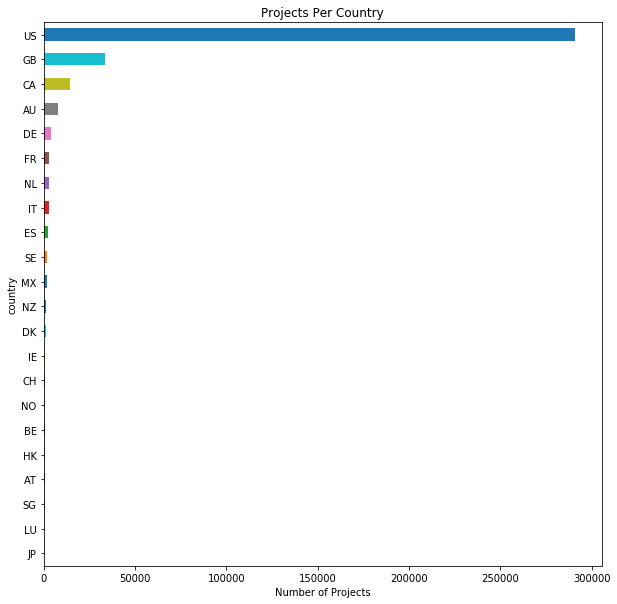

In [24]:
mpl.rcParams['figure.figsize'] = (10,10)
data.groupby('country')['ID'].nunique().sort_values().plot(kind='barh')
plt.title('Projects Per Country')
plt.xlabel('Number of Projects')
plt.show()


This visualization showcases each country participating in Kickstarter campaigns, with the X axis showing number of projects, and y-axis showing the number of projects. From here, we can see that the US has the most amount of projects, followed by GB, Canada and Australia


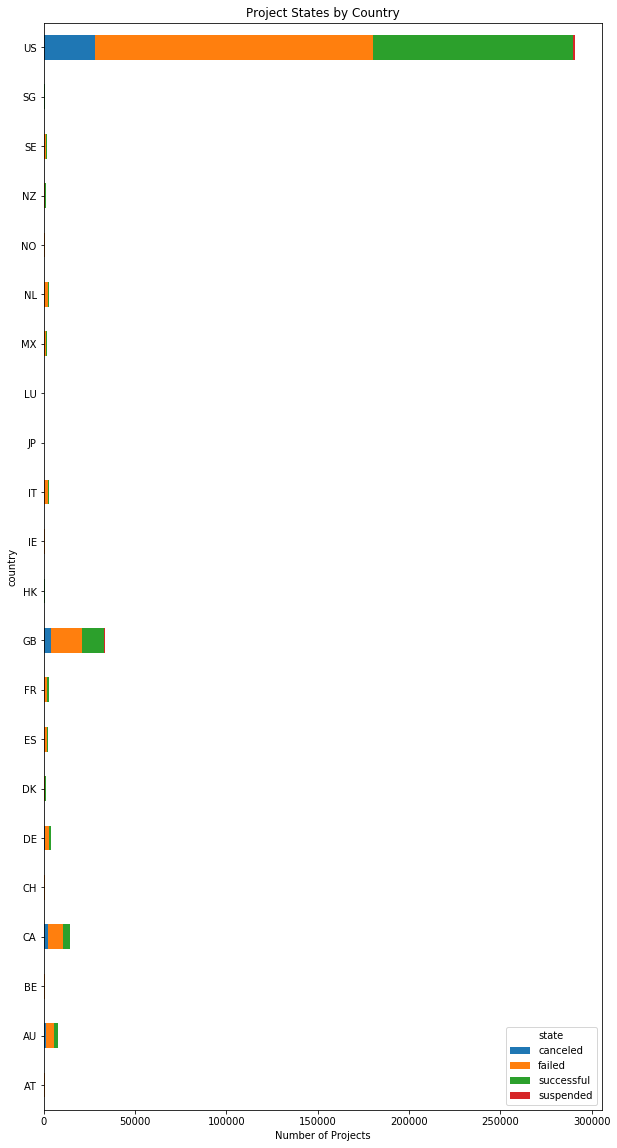

In [25]:

mpl.rcParams['figure.figsize'] = (10,20)
data.groupby(['country','state'])['ID'].size().unstack().sort_values(by='country').plot(kind='barh',stacked=True)
plt.title("Project States by Country")
plt.xlabel("Number of Projects")
plt.show()


This cell breaks down each country's Kickstarter activity, based on whether a project has failed, was successful, suspended or canceled. While numberr of projects are on the x axis, countries are on the y axis. From here, we can see the proportions of each nation's Kickstarter campaigns, and visualize the proportion that is successful. 


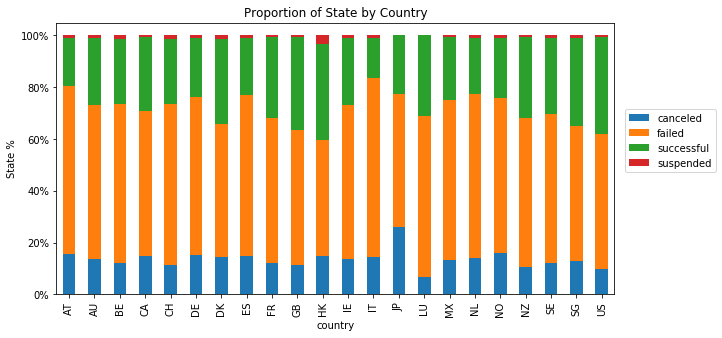

In [26]:
#Another visualization for countries, showing clear percentage ranges
mpl.rcParams['figure.figsize'] = (10,5)
country_state = data.groupby(['country','state']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mpl.ticker.PercentFormatter())
plt.title("Proportion of State by Country")
plt.ylabel("State %")
plt.legend(loc='upper center', bbox_to_anchor=(1.1, .7))
plt.show()

The visualization explores the proportions of successful vs. unsuccessful campaigns in detail for each country, by looking at the percentages of each state in the dataset. While we can more clearly see the percentages of each country's campaigns, this visualization does not consider the amount of projects per country, which can introduce bias when viewing the data (smaller sample size for other countries), which is why we examine both percentage based and number based proportions


### Category

In [27]:
main_category_counts = data.groupby('main_category')['ID'].nunique().sort_values()
category_counts = data.groupby('category')['ID'].nunique().sort_values()

# Calculating and printing out range, mean, median, and mode
print('Number of categories: ', len(category_counts))
print('Number of main categories: ', len(main_category_counts))
print('Range: ', main_category_counts.min(), ' - ', main_category_counts.max())
print('Mean: ', round(main_category_counts.mean(),2))
print('Standard Deviation: ', round(main_category_counts.std(),2))
print('Median: ', main_category_counts.median())
print('Mode: ', main_category_counts.mode().values[0])


Number of categories:  159
Number of main categories:  15
Range:  3749  -  62363
Mean:  24803.8
Standard Deviation:  17120.68
Median:  24416.0
Mode:  3749


There are 159 categories and 15 main categories. To focus on the bigger picture, we chose to analyze the main categories. The number of projects in each category ranges from 3749 projects to 62363 projects. The average number of projects in a category is 24803.

From these statistics, we can infer that the popularity of each category differs drastically. Our hypothesis is that more popular categories are more successful. 

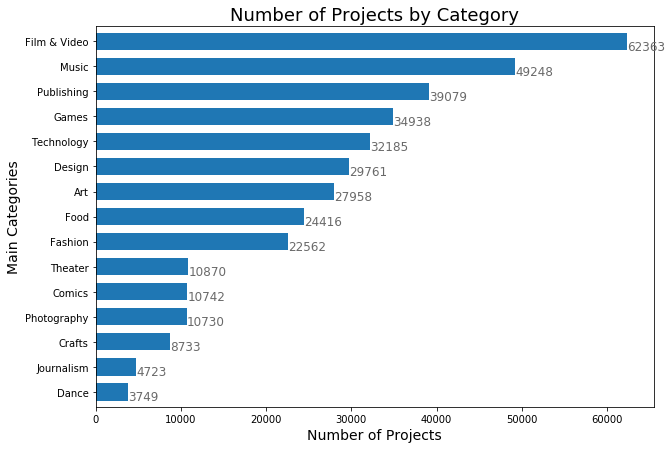

In [28]:
# Not sure why the bar colors aren't different since I'm using a colormap
main_category_counts = data.groupby('main_category')['ID'].nunique().sort_values()

ax = main_category_counts.plot(kind='barh', figsize=(10,7), width=0.7, colormap='tab20')
ax.set_title("Number of Projects by Category", fontsize=18)
ax.set_xlabel("Number of Projects", fontsize=14)
ax.set_ylabel("Main Categories", fontsize=14)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y(), \
            str(round((i.get_width()), 2)), fontsize=12, color='dimgrey')

plt.show()

This graph shows the number of projects in each main category. 

The most popular category is Film & Video, with 62,363 projects. The second and third most popular categories are Music, with 49,248 projects, and Publishing, with 39,079 projects. On the other hand, the least popular category is Dance, with 3,749 projects. The second and third least popular categories are Journalism, with 4,723 projects, and Crafts, with 8,733 projects.


### Goal

In [29]:
# We start our goal analysis by checking out a copy of the data set to work with
data_goal = data
data_goal.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,duration,pledge percent,state code
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015,58.0,0.000000,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,59.0,0.003333,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013,44.0,0.004889,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012,29.0,0.000200,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,55.0,0.065795,2


We start our goal analysis with a descriptive analysis, including finding the mean, mode, median, standard deviation of the goal column of our data set. But first we will drop those columns that are irrelevant to our analysis. As we mentioned before for consistency we will only use one 'goal' column among 'goal' and 'usd_goal_read'. In this case we choose to keep 'usd_goal_real' and 'usd_pledged_real' and drop the others.

In [30]:
# dropping irrelevant columns
data_goal = data_goal[['ID', 'main_category', 'launched_year', 'state', 'usd_pledged_real', 'usd_goal_real', 'state code', 'pledge percent']]

# renaming those columns to be more concise
data_goal.columns = ['ID', 'main_category', 'year', 'state', 'pledged', 'goal', 'state code', 'pledge percent']

In [31]:
# Let's describe our data set statistically with pandas.describe()
print("The range of goal amount is: ", data_goal['goal'].min(), "-", data_goal['goal'].max())
print("The average of goal amount is: ", data_goal['goal'].mean())
print("The standard deviation of goal amount is: ", data_goal['goal'].std())
print("The mode of goal amount is: ", data_goal['goal'].mode()[0])
print("The median of goal amount is: ", data_goal['goal'].median())

The range of goal amount is:  0.01 - 166361390.71
The average of goal amount is:  45738.69636405175
The standard deviation of goal amount is:  1151696.0136039453
The mode of goal amount is:  5000.0
The median of goal amount is:  5500.0


The presence of a high average value and a high standard deviation value, as compared to median and mode, suggests that we have a few outliers that have a huge goal amount, so they bumped up the average, let's examine the 25% quantile and 75% quantile. We do not expect these numbers to be too high.

In [32]:
print("The 25% quantile of goal amount is: ", data_goal['goal'].quantile(0.25))
print("The 75% quantile of goal amount is: ", data_goal['goal'].quantile(0.75))

The 25% quantile of goal amount is:  2000.0
The 75% quantile of goal amount is:  16000.0


So we see most data lies somewhere within the range of 2000 to 16000, which meets our expectation. Next we want to visualize our data set to get a more straightforward understanding of how our data set is distributed. We will use a logarithmic scale on both axis since we have a lot of projects and some projects have huge goal amount.

Text(0.5, 1.0, 'Projects distribution on logrithmic scale')

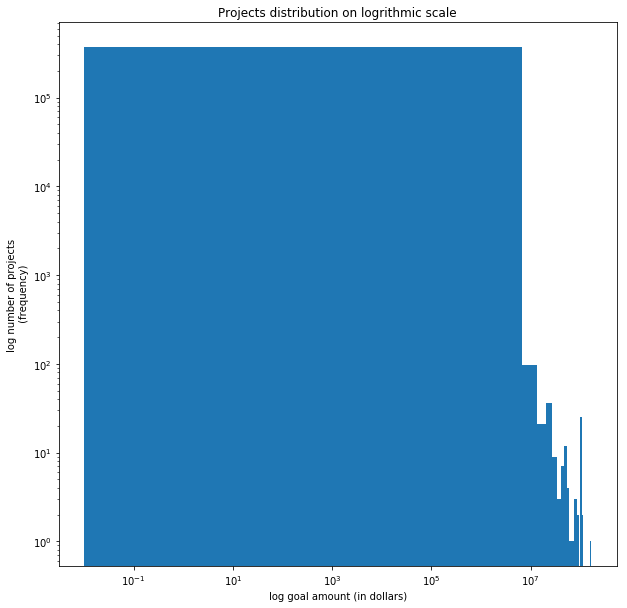

In [33]:
goal_hist_ungrouped = data_goal[['goal']].plot(kind = 'hist', bins = 25, figsize = (10, 10), loglog = True, legend = None)
goal_hist_ungrouped.set_ylabel('log number of projects\n (frequency)')
goal_hist_ungrouped.set_xlabel('log goal amount (in dollars)')
goal_hist_ungrouped.set_title('Projects distribution on logrithmic scale')

Above illustration shows that there are a lot of distinct projects goal amount, so we should group projects together according to their goal amount. Grouping them together, i.e. putting them into bins, can help us to graph a bar chart that is much cleaner and useful. We set bins according to the logarithm of their goal amount, for example, projects with goal amount 10-100 will be in the same bin, 100-1000 will be in the same bin, and so on.

In [34]:
print("If we don't group the projects, there are {} projects with distinct goal amount.".format(len(data_goal['goal'].unique())))
print("To group the projects together, we will need {} bins.".format(int(np.ceil(np.log10(data_goal['goal'].max())))))

If we don't group the projects, there are 49574 projects with distinct goal amount.
To group the projects together, we will need 9 bins.


In [35]:
data_bin_1 = data_goal[(data_goal['goal'] >= 0) & (data_goal['goal'] < 10)]
data_bin_2 = data_goal[(data_goal['goal'] >= 10) & (data_goal['goal'] < 100)]
data_bin_3 = data_goal[(data_goal['goal'] >= 100) & (data_goal['goal'] < 1000)]
data_bin_4 = data_goal[(data_goal['goal'] >= 1000) & (data_goal['goal'] < 10000)]
data_bin_5 = data_goal[(data_goal['goal'] >= 10000) & (data_goal['goal'] < 100000)]
data_bin_6 = data_goal[(data_goal['goal'] >= 100000) & (data_goal['goal'] < 1000000)]
data_bin_7 = data_goal[(data_goal['goal'] >= 1000000) & (data_goal['goal'] < 10000000)]
data_bin_8 = data_goal[(data_goal['goal'] >= 10000000) & (data_goal['goal'] < 100000000)]
data_bin_9 = data_goal[(data_goal['goal'] >= 100000000) & (data_goal['goal'] < 1000000000)]

bin_dict = {1 : data_bin_1, 2 : data_bin_2, 3 : data_bin_3, 4 : data_bin_4, 5 : data_bin_5, 6 : data_bin_6,
           7 : data_bin_7, 8 : data_bin_8, 9 : data_bin_9 }

for i in range(1, 10) : 
    print("There are %6d projects with goal amount between %d and %d dollars." % (len(bin_dict[i].index), 0 if i == 1 else 10**(i - 1), 10**i))

There are    772 projects with goal amount between 0 and 10 dollars.
There are   3609 projects with goal amount between 10 and 100 dollars.
There are  43106 projects with goal amount between 100 and 1000 dollars.
There are 180564 projects with goal amount between 1000 and 10000 dollars.
There are 127985 projects with goal amount between 10000 and 100000 dollars.
There are  14641 projects with goal amount between 100000 and 1000000 dollars.
There are   1193 projects with goal amount between 1000000 and 10000000 dollars.
There are    158 projects with goal amount between 10000000 and 100000000 dollars.
There are     29 projects with goal amount between 100000000 and 1000000000 dollars.


We observe that most projects' goals fall within the 1,000 - 100,000 range, which agree with the fact that the 20% quantile of goal is 2000 dollars and the 75% quantile is 16,000 dollars. Now we can neatly represent our data on graph.

In [36]:
# create a data frame whose indices are the bins and value is the number of projects of that bin
bin_sum_dict = {}
for (key, value) in bin_dict.items() :
     bin_sum_dict["10^" + str(key)] = int(len(value['goal'].index))
    
data_bin = pd.DataFrame.from_dict(bin_sum_dict, orient = 'index', columns = ['# of projects'])

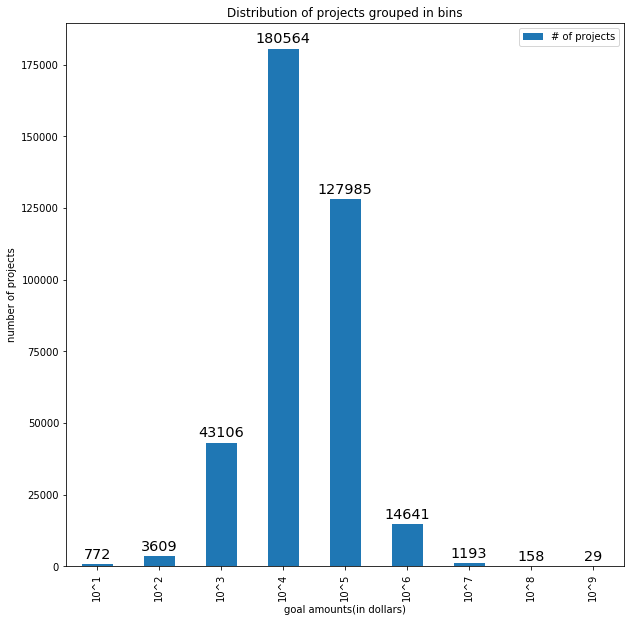

In [37]:
bar_bin_sum = data_bin.plot.bar(figsize = (10,10))
bar_bin_sum.set_ylabel('number of projects')
bar_bin_sum.set_xlabel('goal amounts(in dollars)')
bar_bin_sum.set_title('Distribution of projects grouped in bins')

for rects in bar_bin_sum.patches :
    bar_bin_sum.annotate("%d" % rects.get_height(), xy = (rects.get_x() + rects.get_width() / 2, rects.get_height() + 2000), ha = 'center', 
                  fontsize = 'x-large')

From the above graph we are tempted to guess that goal is normally distributed, we test this null hypothesis with pandas.normaltest(), with a $\alpha$ value of 0.01.

In [38]:
(k_value, p_value) = stats.normaltest(data_goal['goal'])
if p_value < 0.01 :
    print("p_value is %0.1f, thus we can reject the null hypothesis." % p_value)
else :
    print("p_value is %0.1f, we do not have evidence to reject the null hypothesis." % p_value)

p_value is 0.0, thus we can reject the null hypothesis.


Above test shows that goal is in fact not normally distributed.

### Duration

launched_year
2009     1329
2010    10519
2011    26237
2012    41163
2013    44836
2014    66993
2015    74919
2016    56536
2017    49525
Name: ID, dtype: int64


Text(0.5, 1.0, 'Projects Started Per Year')

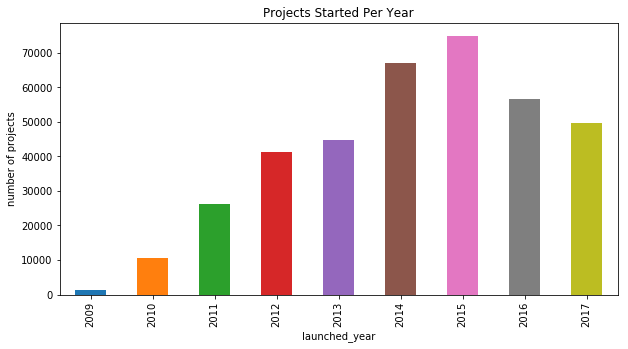

In [39]:
#group the launched years together
start_time_cnt = data.groupby([data.launched_year]).count().ID
print(start_time_cnt)
graph = start_time_cnt.plot.bar()
graph.set_ylabel('number of projects')
graph.set_title("Projects Started Per Year")

In [40]:
# Calculating and printing out range, mean, median, and mode
print('Range: ', data.duration.min(), ' - ', data.duration.max())
print('Mean: ', round(data.duration.mean(),2))
print('Standard Deviation: ', round(data.duration.std(),2))
print('Median: ', data.duration.median())
print('Mode: ', data.duration.mode().values[0])

Range:  0.0  -  91.0
Mean:  33.18
Standard Deviation:  12.79
Median:  29.0
Mode:  29.0


Projects' durations range from between 0 and 91 days. A duration of 0 days means that the project's duration is less than 1 whole day.

The average length of a project is around 33 days while the standard deviation is around 13 days. Both the median and the most common duration (i.e., the mode) are 29 days.

From these statistics, given that products often take several months to several years to develop, we can infer that project authors use Kickstarter to gather funds relatively quickly.

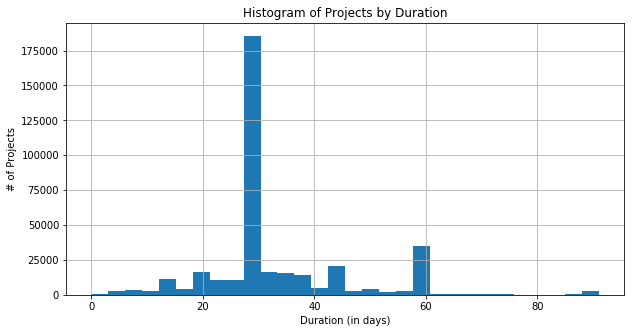

In [41]:
# Plot histogram of projects by their duration in days
dur_hist = data.hist(column='duration', figsize=(10,5), bins=30)

# Label title and axes
ax = dur_hist.flatten()[0]
ax.set_title('Histogram of Projects by Duration')
ax.set_xlabel('Duration (in days)')
ax.set_ylabel('# of Projects')
print()

In [42]:
# Normal distribution test
norm_st, norm_p = stats.normaltest(data.duration)
print('p value: ', norm_p)

alpha = 0.01
print('alpha: ', alpha)
print()

# Check if we can or cannot reject the null hypothesis
if norm_p < alpha:
    print('We can reject the null hypothesis of data normal distribution.')
else:
    print('We cannot reject the null hypothesis of data normal distribution.')

p value:  0.0
alpha:  0.01

We can reject the null hypothesis of data normal distribution.


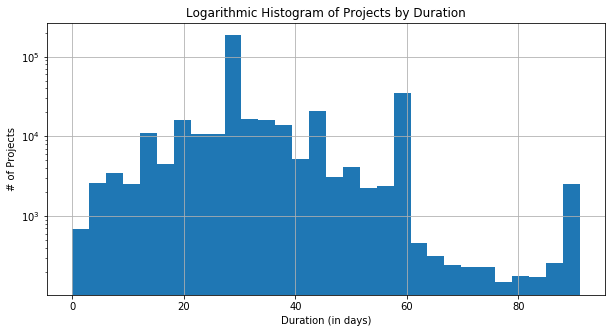

In [43]:
# Plot histogram of projects in logarithmic scale by their duration in days
dur_hist = data.hist(column='duration', figsize=(10,5), bins=30)

# Label title and axes
ax = dur_hist.flatten()[0]
ax.set_title('Logarithmic Histogram of Projects by Duration')
ax.set_xlabel('Duration (in days)')
ax.set_ylabel('# of Projects')
ax.set_yscale('log')
print()

By plotting a histogram of the projects by their duration, we can see the dataset's general distribution. It does not seem to be normally distributed. And this is later confirmed by performing a normal distribution test with an alpha value of 0.01.

This graph visually demonstrates that most of the projects are around 30 days long, confirming the statistics calculated earlier.

Also, there seems to be relative spikes in common durations at the 1 month, 2 months, and 3 months marks. These spikes are emphasized by seeing the histogram in a lograithmic scale.

# Data Analysis & Results

## Analysis Comparing States

### Duration Statistics by State

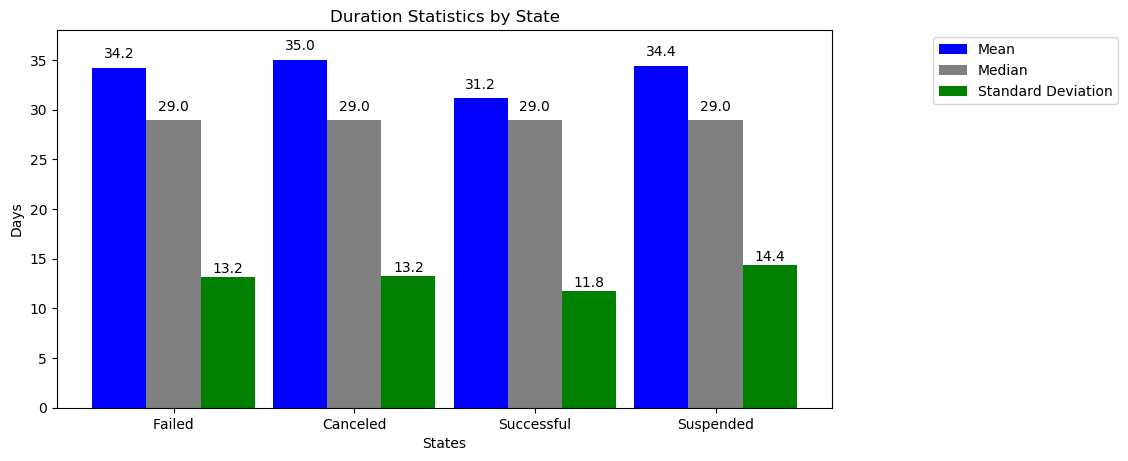

In [44]:
# Calculate duration means, medians, standard deviations for each state
states = data.state.unique()
means = []
medians = []
stds = []

for s in states:
    subset = data.loc[data.state == s].duration
    means += [subset.mean()]
    medians += [subset.median()]
    stds += [subset.std()]
    
    
# Graph values
width = 0.3
xs = np.arange(4)
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
fig_means = ax.bar(xs, means, width, color='blue')
fig_medians = ax.bar(xs+width, medians, width, color='grey')
fig_stds = ax.bar(xs+width*2, stds, width, color='green')

# Add labels to graph
ax.set_title('Duration Statistics by State')
ax.set_xlabel('States')
ax.set_ylabel('Days')
ax.set_xticks(xs + width)
ax.set_xticklabels(('Failed', 'Canceled', 'Successful', 'Suspended'))
ax.legend((fig_means[0], fig_medians[0], fig_stds[0]), ('Mean', 'Median', 'Standard Deviation'), loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_ylim([0, 38])

for figs in [fig_means, fig_medians, fig_stds]:
    for rect in figs:
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.03*h, '%.1f'%float(round(h, 1)), ha='center')

plt.show()

In [45]:
# Differences in duration, on average, between successful projects and others
# Calculated in percentage
for i in [0,1,3]:
    print('Successful vs {}: {}%'.format(states[i], round((means[2] - means[i]) / means[2], 4)*100))

Successful vs failed: -9.69%
Successful vs canceled: -12.31%
Successful vs suspended: -10.5%


We calculated the means, medians, and standard deviations for project durations for each of the 4 states: failed, canceled, successful, and suspended.

The median is the same for all 4 states.

The standard deviation is the same between projects that have failed or been canceled. Successful projects have a smaller standard deviation compared to those while suspended projects have a bigger standard deviation.

The average duration is similar between projects that have failed, been canceled, or been suspended. Successful projects, however, have a smaller mean compared to the others. As calculated in the following box, on average, successful projects are 9.7%, 12.3%, and 10.5% shorter than failed, canceled, and suspended projects, respectively.

This observation was not expected. It was expected that if projects have a longer time to get pledges, they would have a better chance to succeed. We observe the opposite of that. Successful projects are shorter on average.

### Comparing Percentage of Each State Per Duration Bin

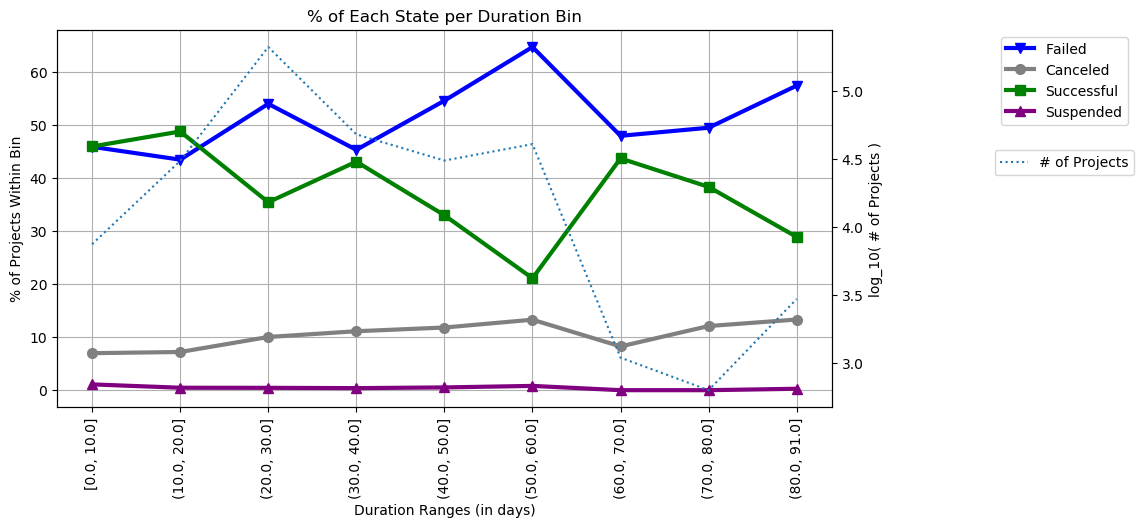

In [46]:
# Create a new column 'duration_bin' with the data from cutting the dataframe into duration ranges
data['duration_bin'] = pd.cut(data.duration, bins=[0,10,20,30,40,50,60,70,80,91], right=True, include_lowest=True)

# Group by duration bins and state
bin_state = data.groupby(['duration_bin', 'state']).size()

# Calculate percentage of each state per bin
bin_state = bin_state.groupby(level=0).apply(lambda x: 100*x/x.sum())

# Separate into each state
canceled_bin, failed_bin, successful_bin, suspended_bin = bin_state.unstack(0).values

# Replace nan in suspended_bin with 0
suspended_bin = np.nan_to_num(suspended_bin)

# Graph % of each state per duration bin
ax1 = plt.figure(dpi=100).add_subplot(111)
ax1.plot(range(9), failed_bin, linewidth=3, color='blue', label='Failed', marker='v', markersize=7)
ax1.plot(range(9), canceled_bin, linewidth=3, color='grey', label='Canceled', marker='o', markersize=7)
ax1.plot(range(9), successful_bin, linewidth=3, color='green', label='Successful', marker='s', markersize=7)
ax1.plot(range(9), suspended_bin, linewidth=3, color='purple', label='Suspended', marker='^', markersize=7)


# Graph log_10(# of projects)
log_count = np.log10(data.duration_bin.value_counts().reindex(bin_state.unstack(-1).index.tolist()))
ax2 = ax1.twinx()
ax2.plot(range(9), log_count, label='# of Projects', linestyle=':')


# Add labels to graph
plt.title('% of Each State per Duration Bin')
ax1.set_xlabel('Duration Ranges (in days)')
ax1.set_ylabel('% of Projects Within Bin')
ax1.set_xticklabels([(), pd.Interval(0.0, 10.0, closed='both')]+bin_state.unstack(-1).index.tolist()[1:], rotation=90)
ax1.grid()
ax1.legend(loc='upper center', bbox_to_anchor=(1.3, 1))

ax2.set_ylabel('log_10( # of Projects )')
ax2.legend(loc='upper center', bbox_to_anchor=(1.3, .7))

plt.show()

In [47]:
# Print table of values graphed above
print('\t\t', '\t'.join(['[0,10]','(10,20]','(20,30]','(30,40]','(40,50]','(50,60]','(60,70]','(70,80]','(80,91]']))
print('Failed:\t\t', '\t'.join(map(lambda x:str(x)+'%', map(lambda x:round(x, 1), failed_bin))))
print('Canceled:\t', '\t'.join(map(lambda x:str(x)+'%', map(lambda x:round(x, 1), canceled_bin))))
print('Successful:\t', '\t'.join(map(lambda x:str(x)+'%', map(lambda x:round(x, 1), successful_bin))))
print('Suspended:\t', '\t'.join(map(lambda x:str(x)+'%', map(lambda x:round(x, 1), suspended_bin))))

		 [0,10]	(10,20]	(20,30]	(30,40]	(40,50]	(50,60]	(60,70]	(70,80]	(80,91]
Failed:		 45.9%	43.5%	54.0%	45.4%	54.6%	64.8%	48.0%	49.5%	57.5%
Canceled:	 7.0%	7.2%	10.0%	11.1%	11.8%	13.3%	8.3%	12.1%	13.3%
Successful:	 46.0%	48.8%	35.5%	43.1%	33.0%	21.1%	43.7%	38.4%	28.9%
Suspended:	 1.1%	0.5%	0.4%	0.4%	0.5%	0.8%	0.0%	0.0%	0.3%


We grouped up the projects into bins based on duration. Each bin is of 10 days, except for the last bin (80,91] that also contains the relatively few projects that are 91 days long. Then, we calculated and graphed the percentages of projects of each state per bin. For example, from projects with durations in (10,20], 43.5% of the projects failed, 7.2% were canceled, 48.8% were successful, and 0.5% were suspended.

This graph shows big fluctuations in the percentages of failed and successful projects. In some ranges (e.g., [0,10], (30,40]), the failed and the successful rates are similar. In other ranges (e.g., (50,60], (80,91]), the rates are significantly different. Furthermore, since, in total, there are more failed projects than successful, it makes sense that the failed rates are higher than successful rates. However, in two cases ([0,10], (10,20]), the successful rates are higher than the failed.

We can observe a pattern behind these observations by graphing a fifth line to show the number of projects, or volume, in each range. We graphed this in logaritmic scale to more clearly see this trend.

The general trend that seems to be behind these observations is that failed rates spike up as the volume of projects spike up. These, in turn, have an opposite effect on the successful rates. This is observed in the 3 volume spikes at ranges (20,30], (50,60], and (80,91]. On the other hand, when the volume of projects decrease, as can be seen in ranges (30,40] and (60,70], the failed rate decreases and the successful rate increases.

We do not believe that this infers that the chance of a project succeeding increases or decreases based on volume spikes. It is more probable that authors of projects that are more likely to fail tend to choose durations of 1, 2, or 3 months.

However, even if we ignore the datapoints at the 3 volume spikes, there is a negative trend in successful rates as duration increases (i.e., 46% at [0,10] and 38.4% at (70,80]). The opposite is seen in the positive trend in canceled rates as duration increases (i.e., 7% at [0,10] and 12.1% at (70,80]).

### Comparing Percentage of each state per Goal Per Day bin

In [48]:
goal_per_day = []

#Remove all NaN values for duration 
df_clean = data.dropna(subset=['duration'])

for index in df_clean.index:
    goal_amount = data['goal'][index]
    proj_duration = data['duration'][index]
    ratio = goal_amount / proj_duration
    goal_per_day.append(ratio)
    

data.insert(11, "goal_per_day", goal_per_day, True)


data[['goal_per_day']] = data[['goal_per_day']].fillna(value=0)

data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=["goal_per_day"], how="all")


c:\users\isaac\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


In [68]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,duration,pledge percent,state code,duration_bin,gpd_bin
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,GB,0.0,0.0,1533.95,2015,58.0,0.000000,0,"(50.0, 60.0]","(-0.001, 1000.0]"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,US,100.0,2421.0,30000.00,2017,59.0,0.003333,0,"(50.0, 60.0]","(-0.001, 1000.0]"
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,US,220.0,220.0,45000.00,2013,44.0,0.004889,0,"(40.0, 50.0]","(1000.0, 2000.0]"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,US,1.0,1.0,5000.00,2012,29.0,0.000200,0,"(20.0, 30.0]","(-0.001, 1000.0]"
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,US,1283.0,1283.0,19500.00,2015,55.0,0.065795,2,"(50.0, 60.0]","(-0.001, 1000.0]"


In [50]:
data.launched_year.unique()

array([2015, 2017, 2013, 2012, 2016, 2014, 2010, 2011, 2009], dtype=int64)

In [51]:
years = data.launched_year.unique()

means = []
medians = []

for year in years:
    subset = data.loc[data.launched_year == year].goal_per_day
    subset = subset.values
    means += [np.mean(subset[np.isfinite(subset)])]
    medians += [np.median(subset[np.isfinite(subset)])]




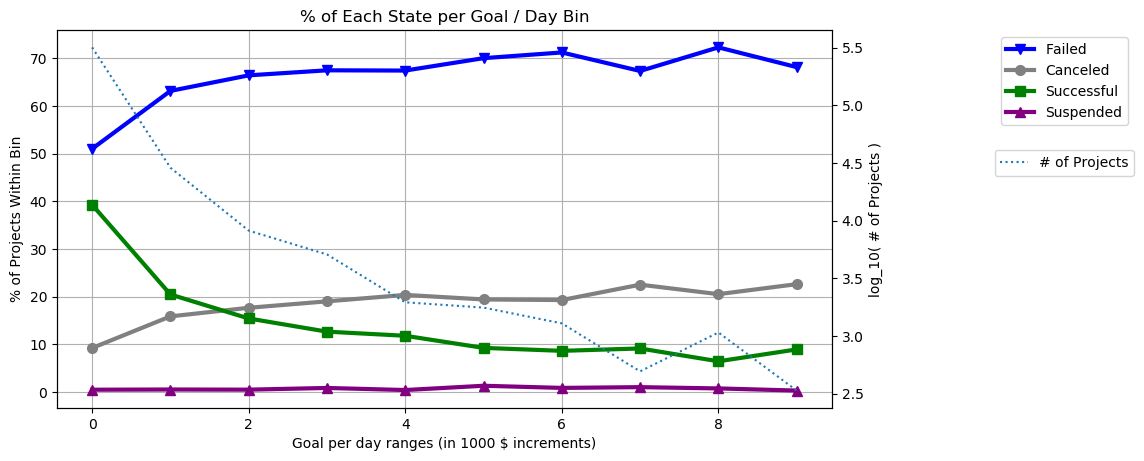

In [52]:
#data has goal per day data, let's analyze this data. More particularly, look at the distribution -> how it contributes to success / failure.

#Calculate success percentages of bins (goal per day, in increments of 100)
# Create a new column 'duration_bin' with the data from cutting the dataframe into duration ranges
data['gpd_bin'] = pd.cut(data.goal_per_day, bins=[0, 1000,2000,3000,4000,5000,6000,7000,8000,9000,10000], right=True, include_lowest=True)

# Group by duration bins and state
bin_state = data.groupby(['gpd_bin', 'state']).size()

# Calculate percentage of each state per bin
bin_state = bin_state.groupby(level=0).apply(lambda x: 100*x/x.sum())

# Separate into each state
canceled_bin, failed_bin, successful_bin, suspended_bin = bin_state.unstack(0).values
suspended_bin = np.nan_to_num(suspended_bin)


ax1 = plt.figure(dpi=100).add_subplot(111)

ax1.plot(range(10), failed_bin, linewidth=3, color='blue', label='Failed', marker='v', markersize=7)
ax1.plot(range(10), canceled_bin, linewidth=3, color='grey', label='Canceled', marker='o', markersize=7)
ax1.plot(range(10), successful_bin, linewidth=3, color='green', label='Successful', marker='s', markersize=7)
ax1.plot(range(10), suspended_bin, linewidth=3, color='purple', label='Suspended', marker='^', markersize=7)


# Graph log_10(# of projects)
log_count = np.log10(data.gpd_bin.value_counts().reindex(bin_state.unstack(-1).index.tolist()))
ax2 = ax1.twinx()
ax2.plot(range(10), log_count, label='# of Projects', linestyle=':')

# Add labels to graph
plt.title('% of Each State per Goal / Day Bin')
ax1.set_xlabel('Goal per day ranges (in 1000 $ increments)')
ax1.set_ylabel('% of Projects Within Bin')
ax1.grid()
ax1.legend(loc='upper center', bbox_to_anchor=(1.3, 1))

ax2.set_ylabel('log_10( # of Projects )')
ax2.legend(loc='upper center', bbox_to_anchor=(1.3, .7))

plt.show()



To analyze goal amounts further, we grouped the projects into bins based on goal amount per day. Goal amount per day, is calculated by dividing the goal amount by the project's duration. Each bin is in increments of 1000 USD. 

We calculated and graphed the percentages of projects of each state per bin. For example, from projects with goal amounts per day in the range from 0 to 1000 dollars per day, 20% were successful, around 65% failed, and 15% of the projects were canceled. 

On observation, the graph shows a general trend as success percentage is actually decreasing when the amount (goal per day) is increasing. In all cases, there isn't a single bin where the success percentage is greater than the failure rate. Since there are more failed projects than succeessful in total, it makes sense that the failed rates are higher than successful rates. 


We can observe a clear correlation by graphing a line to show the number of projects / volume in each range. We graph this on a logarithmic scale to more clearly see the trend. 

The general trend seems to be that failed rates have an inverse relation with the number of projects, as failed rates generally increase whilst the number of projects decrease. However, there is an interesting dip in failure rate at the same point there's a dip in volume (more specifically, from 7000 to 8000 USD / day). On the other hand, as the volume of projects decrease, the success percentage of projects in the same ranges generally decrease as well. 

While this doesn't particularly infer that the chance of a project succeeding depends on the volume of projects in a certain range, but depends on other non-funding related factors as well. 


### Comparing the Success Rate Per Goal

We want to see how goal is related to the success rate of the projects. To visually compare them, we calculate the success rate, failure rate, canceled rate, and suspended rate for each bin. Each rate is calculated as $\frac{\text{number of projects with that state}} {\text{total number of projects}}$.

In [53]:
data_bin['successful projects'] = 0
data_bin['failed projects'] = 0
data_bin['canceled projects'] = 0
data_bin['suspended projects'] = 0
data_bin['success rate'] = 0

for (k, v) in bin_dict.items() :
    data_bin.at["10^" + str(k), 'successful projects'] = (v['state'] == 'successful').sum()
    data_bin.at["10^" + str(k), 'canceled projects'] = (v['state'] == 'canceled').sum()
    data_bin.at["10^" + str(k), 'failed projects'] = (v['state'] == 'failed').sum()
    data_bin.at["10^" + str(k), 'suspended projects'] = (v['state'] == 'suspended').sum()
    
data_bin['success rate'] = data_bin['successful projects'] / data_bin['# of projects'] * 100
data_bin['canceled rate'] = data_bin['canceled projects'] / data_bin['# of projects'] * 100
data_bin['failed rate'] = data_bin['failed projects'] / data_bin['# of projects'] * 100
data_bin['suspended rate'] = data_bin['suspended projects'] / data_bin['# of projects'] * 100

Then we plot a bar graph to compare the success rate for each bin. We expect success rate to decrease as the goal amount increase, since projects with higher goal needs to attract more interested backers, and this is more difficult to accomplish.

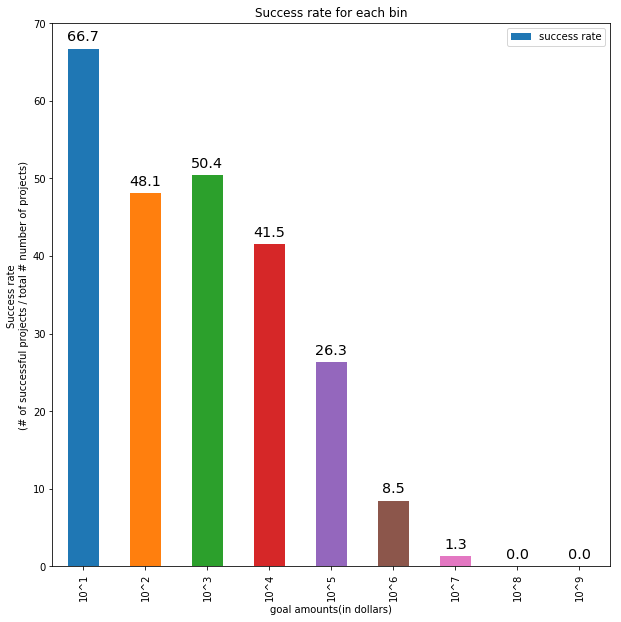

In [54]:
bar_succ_rate = data_bin['success rate'].plot.bar(figsize = (10, 10), legend = None)
bar_succ_rate.set_xlabel('goal amounts(in dollars)')
bar_succ_rate.set_ylabel('Success rate \n(# of successful projects / total # number of projects)')
bar_succ_rate.set_title('Success rate for each bin')
for rects in bar_succ_rate.patches  :
    bar_succ_rate.annotate("%.1f" % rects.get_height(), xy = (rects.get_x() + rects.get_width() / 2, rects.get_height() + 1), ha = 'center', 
                  fontsize = 'x-large')
bar_succ_rate.legend()

Then we plot a stacked bar chart for each of the bin. Each bar of the stack bar chart consists of the four kind of rates for that bin, thus a **percentage stacked bar chart**. We hope this visulization would give us a more straightforward insight into the relationship between goal and status of the project. We expect failure rate to be positively correlated with goal, i.e. the higher the goal the more likely the project will fail.

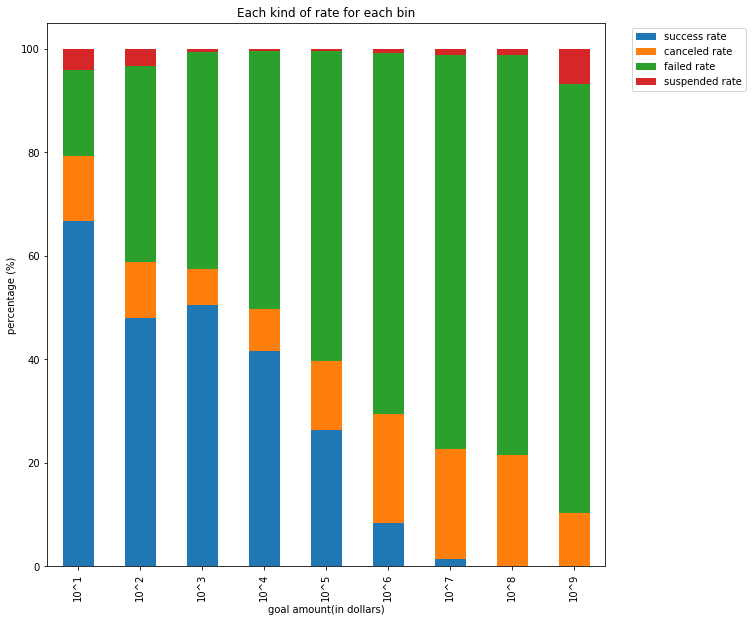

In [55]:
bar_bin_stacked = data_bin[['success rate', 'canceled rate', 'failed rate', 'suspended rate']].plot.bar(
    figsize = (10, 10), stacked = True)

bar_bin_stacked.set_ylabel('percentage (%)')
bar_bin_stacked.set_xlabel('goal amount(in dollars)')
bar_bin_stacked.set_title('Each kind of rate for each bin')

bar_bin_stacked.legend(loc = 'upper center', bbox_to_anchor = (1.15, 1))

So from the above examniation of our data set we find that goal amount and the probability of success is correlated: in general, the higher the goal amount a project declares, the less likely it will be successful. Vice versa, the higher the goal amount it declares, the more likely it will fail. However, the goal amount alone might not be the only reason of this trend, we propose that the reason low goal amount projects are more likely to succeed and vice versa is that their goal amount are easier to achieve. In other words, we hypothesize that there is a positive correlation between the actual pledged amount and success: the more pledge a project gets, the more likely it will be successful, and since low goal amount are more likely to achieve then really expensive ones (one hundred dollars comapred to one million dollars for example), they are more likely to get pledge and succeed. To testify this hypothesis, we propose to use "pledged percentage", i.e. the percentage of goal actually achieved, to investigate the difference between groups.

In [56]:
data_bin['avg pledge percent'] = 0
data_bin['mode pledge percent'] = 0
data_bin['median pledge percent'] = 0
data_bin['std pledge percent'] = 0
for (k,v) in bin_dict.items() :
    data_bin.at['10^' + str(k), 'avg pledge percent'] = v['pledge percent'].sum() / len(v.index) * 100
    data_bin.at['10^' + str(k), 'mode pledge percent'] = v['pledge percent'].mode() * 100
    data_bin.at['10^' + str(k), 'median pledge percent'] = v['pledge percent'].median() * 100
    data_bin.at['10^' + str(k), 'std pledge percent'] = v['pledge percent'].std() * 100

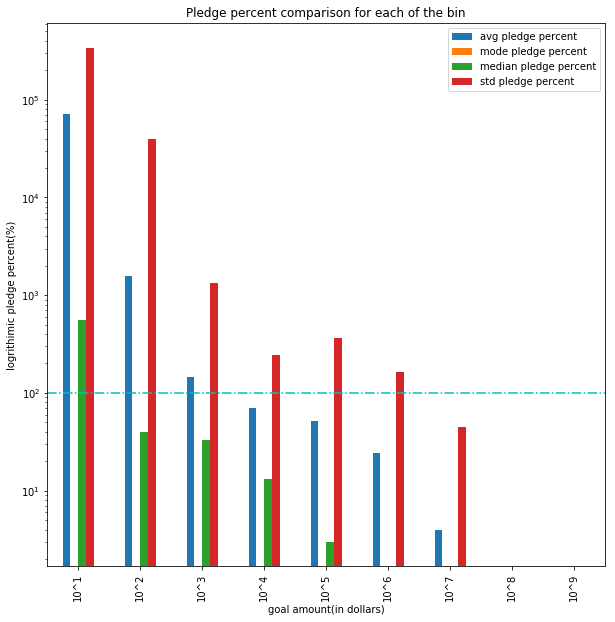

In [57]:
bar_pledge_percent = data_bin[['avg pledge percent', 'mode pledge percent', 'median pledge percent', 'std pledge percent']].plot.bar(figsize = (10, 10))
bar_pledge_percent.set_yscale('log')
bar_pledge_percent.set_ylabel('logrithimic pledge percent(%)')
bar_pledge_percent.set_xlabel('goal amount(in dollars)')
bar_pledge_percent.set_title('Pledge percent comparison for each of the bin')
bar_pledge_percent.axhline(y = 100, color = 'c', linestyle = '-.')

From the above plot we see that our hypothesis is indeed verified -- money pledged to a project is negatively correlated with its goal amount, as goal amount increase the percent of goal achieved decrease. Average may not be a good measure because some groups, especially the first group, it's too easy to exceed the set goal amount, so we also plotted mode and median. It turns out that most projects having goal more than 100,000 dollars are not pledged, from the median plot. We also drew a dotted line at height y = 100, from this line and above, the goals of the projects are reached or exceeded, so we can see that projects that has goal exceeding 1000 dollars on average is under pledged. As a side note, the last two groups are not pledged at all, no body seems to be interested in a project in need of more than ten million dollars. Also notice that standard deviation for all of these groups are quite high, which means that pledge amount varies a lot from project and project, so in this case median is an important metric. 

### Comparing Percentage of Each State Per Category

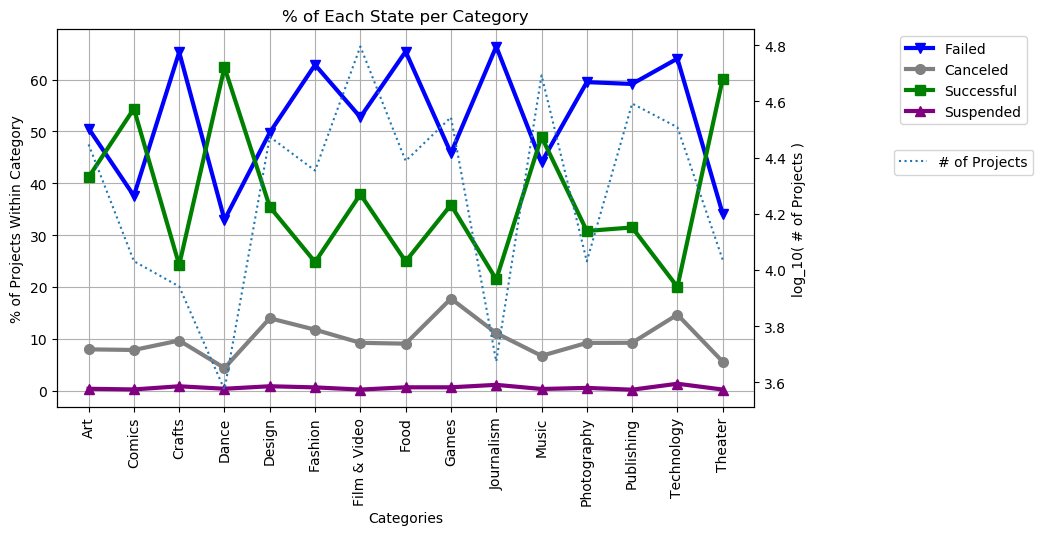

In [58]:
stacked_cats = data.groupby(['main_category','state']).size()
stacked_cats = stacked_cats.groupby(level=0).apply(lambda x: 100*x/x.sum())
canceled, failed, successful, suspended = stacked_cats.unstack(0).values

# Graph % of each state per duration bin
ax = plt.figure(dpi=100, figsize=(9,5)).add_subplot(111)
ax.plot(failed, linewidth=3, color='blue', label='Failed', marker='v', markersize=7)
ax.plot(canceled, linewidth=3, color='grey', label='Canceled', marker='o', markersize=7)
ax.plot(successful, linewidth=3, color='green', label='Successful', marker='s', markersize=7)
ax.plot(suspended, linewidth=3, color='purple', label='Suspended', marker='^', markersize=7)

log_counts = np.log10(main_category_counts.sort_index(ascending=True))
ax2 = ax.twinx()
ax2.plot(range(15), log_counts, label='# of Projects', linestyle=':')

# Add labels to graph
plt.title('% of Each State per Category')
ax.set_xlabel('Categories')
ax.set_ylabel('% of Projects Within Category')
ax.set_xticks(np.arange(0, 15, step=1))
ax.set_xticklabels(stacked_cats.unstack(-1).index.tolist()[0:], rotation=90)
ax.grid()
ax.legend(loc='upper center', bbox_to_anchor=(1.3, 1))

ax2.set_ylabel('log_10( # of Projects )')
ax2.legend(loc='upper center', bbox_to_anchor=(1.3, .7))

plt.show()

The percentage of successful projects in the most popular category Film & Video is below 40%, while the percentage of successful projects in the least popular category Dance is above 60%, which makes it seem like projects in unpopular categories are more likely to succeed. This is also reflected by how Comics has a 55% success rate and Theater has a 60% success rate. However, some unpopular categories such as Crafts and Journalism also have low success rates, and the popular category Music has a 50% success rate.  

Thus, we are unable to conclude that popularity determines success. Rather, we infer from the graph that perhaps the characteristics of each category determines whether a category of projects is generally successful. 

Smaller media projects such as Dance, Music, and Theater seem to be more successful than Film & Video, as they require less funding. Publishing and Journalism might be unpopular as people are less interested in paper media. 

In [59]:
film = data[data.main_category == 'Film & Video']
film_goals = film['usd_goal_real']
print('Film & Video Range: ', film_goals.min(), ' - ', film_goals.max())
print('Film & Video Mean: ', round(film_goals.mean(),2))
print('Film & Video Median: ', film_goals.median())

dance = data[data.main_category == 'Dance']
dance_goals = dance['usd_goal_real']
print('Dance Range: ', dance_goals.min(), ' - ', dance_goals.max())
print('Dance Mean: ', round(dance_goals.mean(),2))
print('Dance Median: ', dance_goals.median())

music = data[data.main_category == 'Music']
music_goals = music['usd_goal_real']
print('Music Range: ', music_goals.min(), ' - ', music_goals.max())
print('Music Mean: ', round(music_goals.mean(),2))
print('Music Median: ', music_goals.median())

Film & Video Range:  0.15  -  151395869.92
Film & Video Mean:  80847.23
Film & Video Median:  7000.0
Dance Range:  5.0  -  2000000.0
Dance Mean:  9585.55
Dance Median:  3300.0
Music Range:  0.74  -  50000000.0
Music Mean:  15820.22
Music Median:  4000.0


As we see from looking at the statistics, Film & Video has a larger max goal amount, as well as a larger mean and median, compared to the Dance and Music categories, which were more successful. 

In [60]:
journalism = data[data.main_category == 'Journalism']
journalism_goals = journalism['usd_goal_real']
print('Journalism Range: ', journalism_goals.min(), ' - ', journalism_goals.max())
print('Journalism Mean: ', round(journalism_goals.mean(),2))
print('Journalism Median: ', journalism_goals.median())

crafts = data[data.main_category == 'Crafts']
crafts_goals = crafts['usd_goal_real']
print('Crafts Range: ', crafts_goals.min(), ' - ', crafts_goals.max())
print('Crafts Mean: ', round(crafts_goals.mean(),2))
print('Crafts Median: ', crafts_goals.median())

Journalism Range:  1.0  -  100000000.0
Journalism Mean:  86546.48
Journalism Median:  5000.0
Crafts Range:  1.0  -  10000000.0
Crafts Mean:  10452.69
Crafts Median:  2327.705


The reason Journalism also has a low success rate also seems to be due to the high goal amounts; however, Crafts seems to be a little more complicated. While its max goal amount and mean are larger than Dance's max goal amount and mean, its median is lower than Dance. Other factors may also play a role in its high failure rate.

## Analysis Over Time

### Percentage of Each State over Time

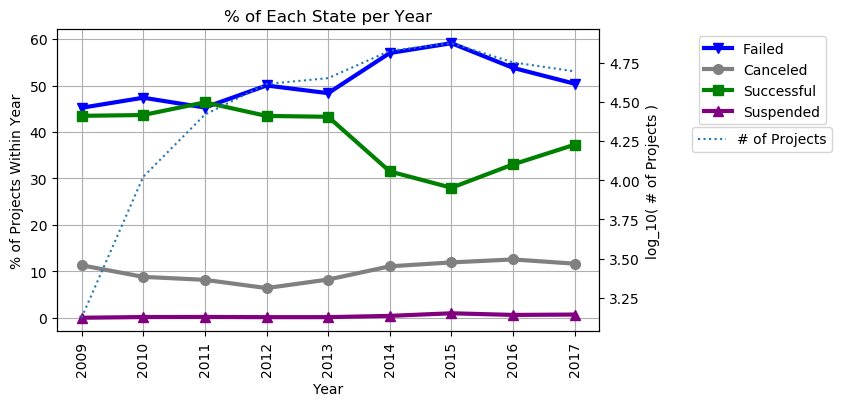

In [61]:
years = data.groupby('launched_year')['ID'].nunique()
stacked_states = data.groupby(['launched_year','state']).size()
stacked_states = stacked_states.groupby(level=0).apply(lambda x: 100*x/x.sum())
canceled, failed, successful, suspended = stacked_states.unstack(0).values
suspended = np.nan_to_num(suspended)

# Graph % of each state per duration bin
ax = plt.figure(dpi=100, figsize=(7,4)).add_subplot(111)
ax.plot(failed, linewidth=3, color='blue', label='Failed', marker='v', markersize=7)
ax.plot(canceled, linewidth=3, color='grey', label='Canceled', marker='o', markersize=7)
ax.plot(successful, linewidth=3, color='green', label='Successful', marker='s', markersize=7)
ax.plot(suspended, linewidth=3, color='purple', label='Suspended', marker='^', markersize=7)

log_counts = np.log10(years.sort_index(ascending=True))
ax2 = ax.twinx()
ax2.plot(range(9), log_counts, label='# of Projects', linestyle=':')

# Add labels to graph
plt.title('% of Each State per Year')
ax.set_xlabel('Year')
ax.set_ylabel('% of Projects Within Year')
ax.set_xticks(np.arange(0, 9, step=1))
ax.set_xticklabels(stacked_states.unstack(-1).index.tolist()[0:], rotation=90)
ax.grid()
ax.legend(loc='upper center', bbox_to_anchor=(1.3, 1))

ax2.set_ylabel('log_10( # of Projects )')
ax2.legend(loc='upper center', bbox_to_anchor=(1.3, .7))

plt.show()

This graph shows the percentage of failed, canceled, successful, and suspended projects per year along with the number of projects per year.

We see that as the annual number of projects grows over time, the percentage of successful projects begins to decrease and the percentage of failed projects begins to increase. From 2013 to 2014, there is a steep drop in success rate and a slight increase in failure rate. However, as the annual number of projects begins to decrease after 2015, the success rate also increases.

This shows that increasing the number of projects does not increase the percentage of successful projects, perhaps due to the fact that the number of people who back Kickstarter projects does not increase.

### Comparing Percentage of Projects in Each Category over Time

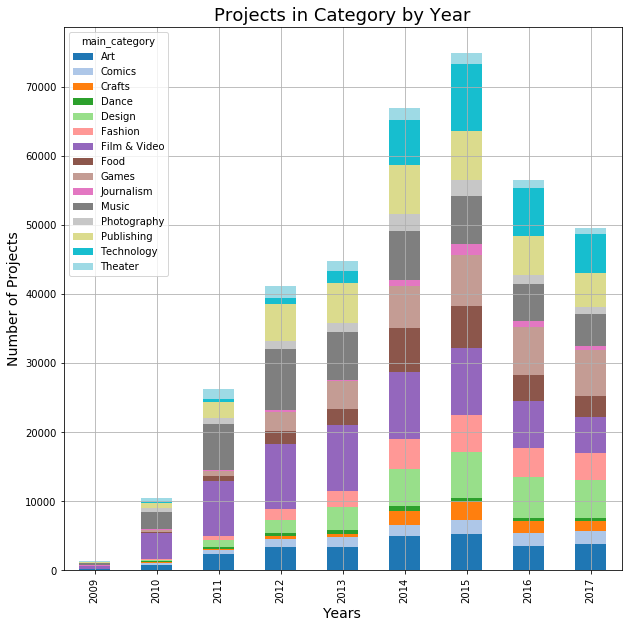

In [62]:
stacked_years = data.groupby(['launched_year','main_category'])['ID'].size().unstack()
ax = stacked_years.plot(kind='bar', figsize=(10,10), stacked=True, colormap='tab20')

ax.set_title("Projects in Category by Year", fontsize=18)
ax.set_ylabel("Number of Projects", fontsize=14)
ax.set_xlabel("Years", fontsize=14)

plt.grid()
plt.show()

Over time, users started more projects in categories such as Design and Games. 2015 saw a spike in the annual number of projects, as well as the number of projects in Film & Video, Technology, and Publishing. However, after 2015, the number of annual Kickstarter projects decreased drastically, as well as the number of projects in most categories. We can infer that the drop in success rates in categories with a increased number of projects is correlated with the subsequent drop in number of projects. 

### Comparing Percentage of Each State of Technology Projects over Time

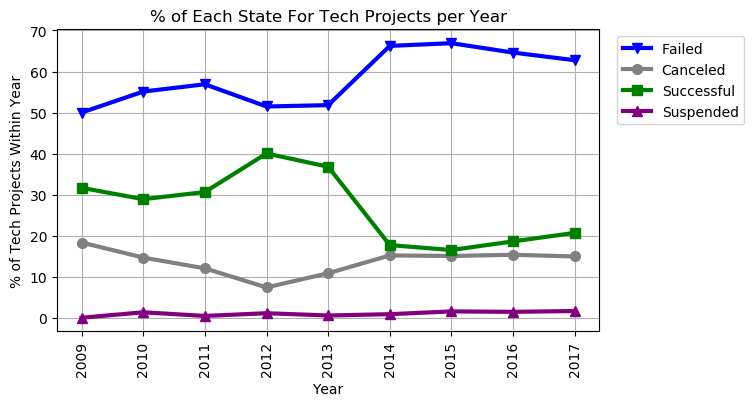

In [63]:
tech_df = data[data.main_category == 'Technology']
stacked_years = data.groupby(['launched_year','main_category']).size()

tech_states = tech_df.groupby(['launched_year','state']).size()
tech_states = tech_states.groupby(level=0).apply(lambda x: 100*x/x.sum())
canceled, failed, successful, suspended = tech_states.unstack(0).values
suspended = np.nan_to_num(suspended)

# Graph % of each state per duration bin
ax = plt.figure(dpi=100, figsize=(7,4)).add_subplot(111)
ax.plot(failed, linewidth=3, color='blue', label='Failed', marker='v', markersize=7)
ax.plot(canceled, linewidth=3, color='grey', label='Canceled', marker='o', markersize=7)
ax.plot(successful, linewidth=3, color='green', label='Successful', marker='s', markersize=7)
ax.plot(suspended, linewidth=3, color='purple', label='Suspended', marker='^', markersize=7)

# Add labels to graph
plt.title('% of Each State For Tech Projects per Year')
ax.set_xlabel('Year')
ax.set_ylabel('% of Tech Projects Within Year')
ax.set_xticks(np.arange(0, 9, step=1))
ax.set_xticklabels(stacked_years.unstack(-1).index.tolist()[0:], rotation=90)
ax.grid()
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1))

plt.show()


If we take a closer look at the Technology category, which saw the largest increase in annual number of projects in the years 2014 and 2015, we can see how that increase is linked with a 15% increase in failure rate and a 20% decrease in success rate from 2013 to 2014. We conclude that the increase in annual number of projects in a category leads to an increase in its failure rate.

### How Project Duration Changes Over Time

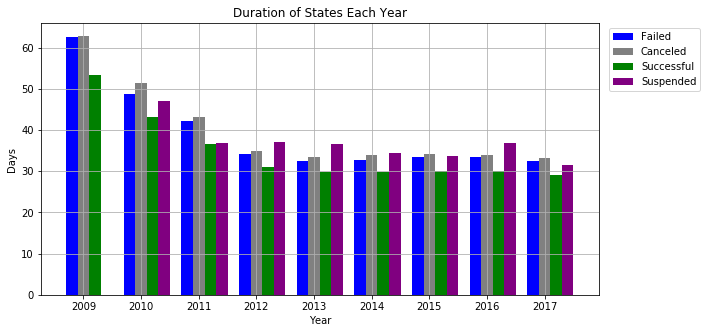

In [64]:
#find average duration for each state by year
states = data.state.unique()
state_durations = np.zeros(shape=(9,4))

for i in range(9):
    for j in range(4):
        state_duration = data.loc[(data.launched_year == i + 2009) & (data.state == states[j])].duration
        state_durations[i][j] = state_duration.mean()
        if np.isnan(state_durations[i][j]):
            state_durations[i][j] = 0

# Graph values
width = 0.2
xs = np.arange(9)

fig = plt.figure()
# 1x1 subplot
ax = fig.add_subplot(111)
fig_failed = ax.bar(xs,state_durations[:,0], width, color='blue')
fig_canceled = ax.bar(xs+width, state_durations[:,1], width, color='grey')
fig_successful = ax.bar(xs+width*2, state_durations[:,2], width, color='green')
fig_suspended = ax.bar(xs+width*3, state_durations[:,3], width, color='purple')

ax.set_xlabel('Year')
ax.set_ylabel('Days')
ax.set_title('Duration of States Each Year')
ax.set_xticks(xs + width)
ax.set_xticklabels(range(2009, 2018))
ax.legend((fig_failed[0], fig_canceled[0], fig_successful[0], fig_suspended[0]), ('Failed', 'Canceled', 'Successful', 'Suspended'), loc='upper center', bbox_to_anchor=(1.1, 1))

plt.grid()
plt.show()

This graph shows the average duration of projects every year by state. This shows that Successful projects are on average shorter than failed projects and failed projects are on average shorter than cancelled projects every year. This also shows that the average duration of projects has decreased by almost half since the beginning of Kickstarter.

### Comparing Project Goal over Time

Let's try to break down the goal of projects by year and see how it varies from year to year.

In [65]:
groups = data_goal.groupby('year')
keys = list(groups.groups.keys())
yr_dict = {}
for key in keys :
    yr_dict[key] = (groups.get_group(key))['goal'].mean()
    
data_goal_yr = pd.DataFrame.from_dict(yr_dict, orient = 'index', columns = ['avg goal'])
data_goal_yr['median goal'] = 0
data_goal_yr['mode goal'] = 0
data_goal_yr['std goal'] = 0
for key in keys :
    data_goal_yr.at[key, 'median goal'] = (groups.get_group(key)['goal']).median()
    data_goal_yr.at[key, 'mode goal'] = (groups.get_group(key)['goal']).mode()[0]
    data_goal_yr.at[key, 'std goal'] = (groups.get_group(key)['goal']).std()
    
# since standard deviation is too large, we divided it by 100, doing this would not change its tendency,
# recovering the original tendency is also a easy matter
data_goal_yr['std goal'] = data_goal_yr['std goal'] / 100

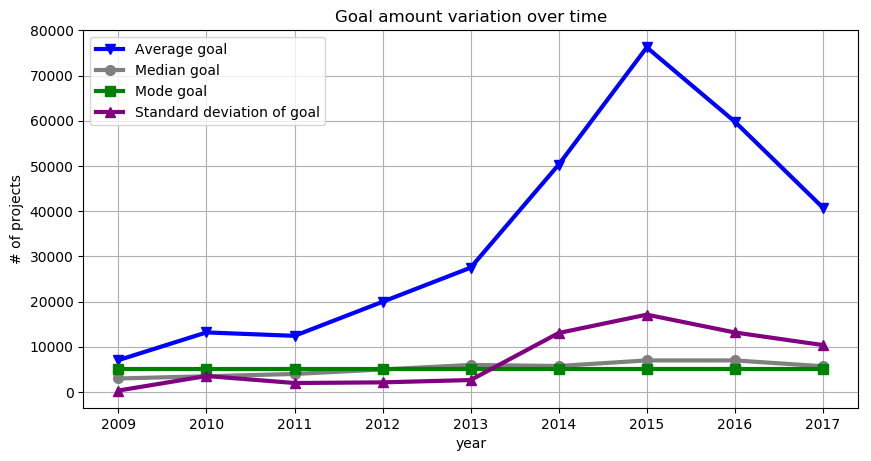

In [66]:
bar_goal_yr = plt.figure(dpi=100).add_subplot(111)
bar_goal_yr.plot(range(9), data_goal_yr['avg goal'], linewidth=3, color='blue', label='Average goal', marker='v', markersize=7)
bar_goal_yr.plot(range(9), data_goal_yr['median goal'], linewidth=3, color='grey', label='Median goal', marker='o', markersize=7)
bar_goal_yr.plot(range(9), data_goal_yr['mode goal'], linewidth=3, color='green', label='Mode goal', marker='s', markersize=7)
#data_goal_yr['std goal'] = np.log10(data_goal_yr['std goal'])
bar_goal_yr.plot(range(9), data_goal_yr['std goal'], linewidth=3, color='purple', label='Standard deviation of goal', marker='^', markersize=7)

bar_goal_yr.set_title('Goal amount variation over time')
bar_goal_yr.set_xlabel('year')
bar_goal_yr.set_ylabel('# of projects')

plt.xticks(range(9))
bar_goal_yr.grid()
bar_goal_yr.set_xticklabels(keys)
bar_goal_yr.legend()

It turns out, from the above graph, that average goal amount varies from year to year. It in general increases over years, peaking at year 2015 when average goal amount reaches 76257.9 dollars, then it steadily decrease. However, when looking at other central tendency measures, we see that they are rather steady over the years. In particular, the mode of goal was 5000 for 8 years, until 2018, which suggests some invariation of Kickstarter author habits over the course of many years. The median amount is also slowly increaseing, peaking at year 2016 and then drops. These observations suggest that there might be some really ambitious projects in year 2015, which drives up the average goal amount, but overall the goal amount change is not very obvious, this is confirmed by a peak in standard deviation at year 2015. 

### Comparing Goal Per Day Over Time

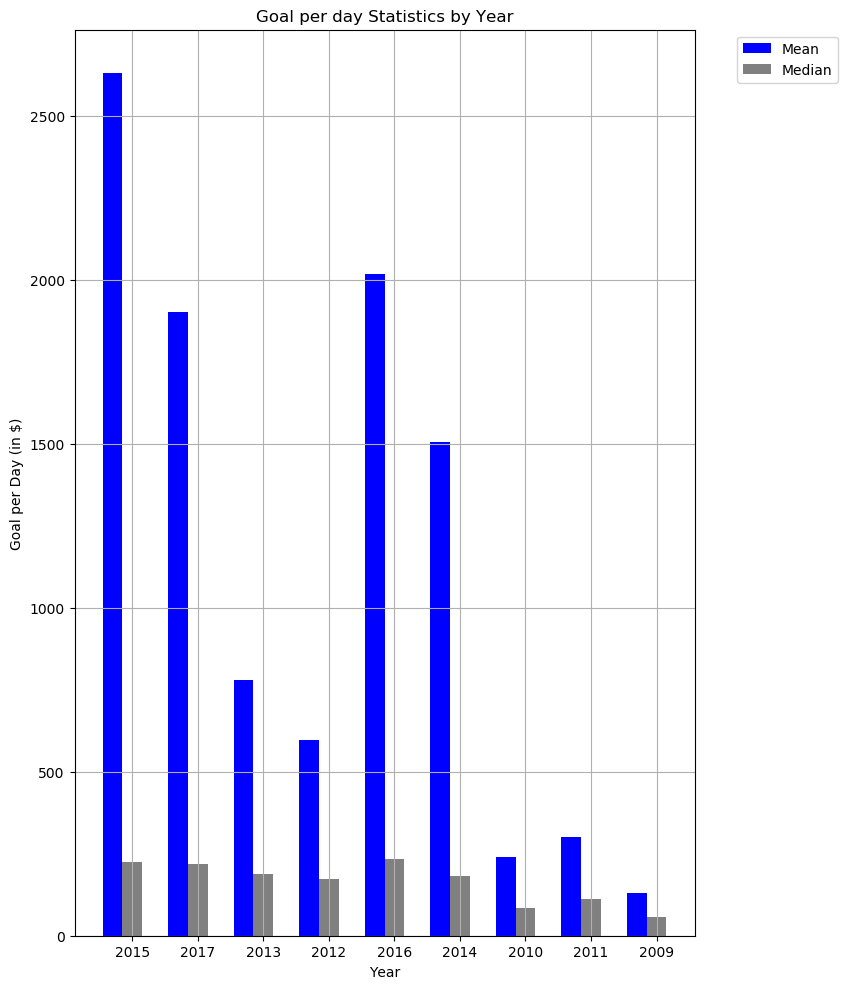

In [67]:
width = 0.3
xs = np.arange(9)
fig = plt.figure(1, figsize=(8, 12), frameon=False, dpi=100)
ax = fig.add_subplot(111)
fig_means = ax.bar(xs, means, width, color='blue')
fig_medians = ax.bar(xs+width, medians, width, color='grey')

# Add labels to graph
ax.set_title('Goal per day Statistics by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Goal per Day (in $)')
ax.set_xticks(xs + width)
ax.set_xticklabels(('2015', '2017', '2013', '2012' , '2016' , '2014' , '2010' , '2011', '2009'))
ax.legend((fig_means[0], fig_medians[0]), ('Mean', 'Median'), loc='upper center', bbox_to_anchor=(1.15, 1))

plt.grid()
plt.show()

The graph above shows the mean and medians in terms of goal per day metrics for each year of kickstarter projects, with the goal amount per day steadily increasing from 2009, and hits a peak in goal amounts per day, confirming our analysis in the previous graph, as goal per day is calculated by goal amount / duration of project.

# Ethics & Privacy

Since Kickstarter is a public crowdfunding platform encouraging various investors, all of the data in our dataset is public. Thus, there aren’t any sizeable concerns in terms of privacy.

In terms of the nature of our dataset in terms of bias, one potential bias is that most of the projects are based in the US, with a sizeable minority in other parts of the world such as the UK, Canada, Australia and France. Because Kickstarter is based in the US, it is simply a reality that analysis of the dataset wouldn’t serve us well for populations outside the US just because of a significantly smaller sample size. A potential way to combat this bias would be to compare overall analysis by breaking it down country by country, but we’d still have to make inferences and extrapolations for populations that are considerably smaller and might not show a clear trend. 

Gabe add here
    

# Conclusion & Discussion

After analyzing the dataset of Kickstarter projects, we found that our results refuted our hypothesis in many ways. We had predicted that successful projects would have a longer duration time and have the highest popularity in categories such as technology. However, we had found that although Dance was the least popular category, with only 3,749 projects, it was the most successful in reaching its pledge goal, reaching a 60% success rate. Additionally, we had predicted that projects with a longer duration on average, would have a high success rate. Contrary to that, the average duration was actually similar between projects that failed, were cancelled, or suspended. Successful projects had a smaller duration time, on average, at 9.7%, 12.3%, and 10.5% shorter than failed, cancelled, and suspended projects, respectively. This could be because shorter projects tended to have smaller pledge goal amounts, which in turn, would be met at a higher success rate. Overall, our prediction in which campaign characteristics had a positive effect on the project’s state were different from what we had predicted. 

We hypothesized that Kickstarter project authors primarily use Kickstarter to fund tech projects with large goals and that the success rate of these projects rose as more people knew about Kickstarter and donated. After doing analysis, we found that most project goals fell in the 100-1000 dollar range. From this, we infer that Kickstarter authors mostly use Kickstarter as a way to fund side projects rather than start companies. We also found that success rates over time dropped from 40% to 30%. So, our second hypothesis was wrong as well. This might be due to the rate of project numbers growing faster than the growth of contributors over time. After doing category analysis we found that technology was not the most popular category, and that the category "video and film" was.hypto

Some limitations to our analysis are the lack of data on the person who owned the project and what they did to market their project. The work in promoting and selling a Kickstarter idea most likely has an effect on the success or state of a project. So, our analysis of project state is very limited because it does not include the significant factor of project owner marketing. Another limitation of the data is that even though we can observe trends in data, we cannot infer causal relationships or draw definitive conclusions about why these trends occur. An example of this is that although we saw Kickstarter project durations drop by nearly half over the years, we could not offer an explanation as to why this was the case. A possible extension of this project could be another study examining relationships between Kickstarter trends and economic health. 
